In [50]:
using CovidSim

In [47]:
seed_1_6 = seed_case_gen(1, [0,3,3,0,0], 5, nil, agegrps)
seed_6_12 = seed_case_gen(8, [0,6,6,0,0], 5, nil, agegrps)

(::CovidSim.var"#scase#73"{CovidSim.var"#scase#72#74"{Int64,Array{Int64,1},Int64,Int64,UnitRange{Int64}}}) (generic function with 1 method)

In [48]:
alldict, evn, series = run_a_sim(180,11, silent=true,
        spreadcases=[], 
        runcases=[seed_1_6, seed_6_12]);
geo = alldict["geo"];

*** seed day 1 locale 11....
*** seed day 8 locale 11....
at day 10 r0 = 1.97
at day 20 r0 = 2.02
at day 30 r0 = 2.02
at day 40 r0 = 2.01
at day 50 r0 = 2.08
at day 60 r0 = 1.95
at day 70 r0 = 1.92
at day 80 r0 = 1.78
at day 90 r0 = 1.51
at day 100 r0 = 1.22
at day 110 r0 = 0.86
at day 120 r0 = 0.67
at day 130 r0 = 0.61
at day 140 r0 = 0.59
at day 150 r0 = 0.55
at day 160 r0 = 0.55
at day 170 r0 = 0.55
at day 180 r0 = 0.54
Simulation completed for 180 days.


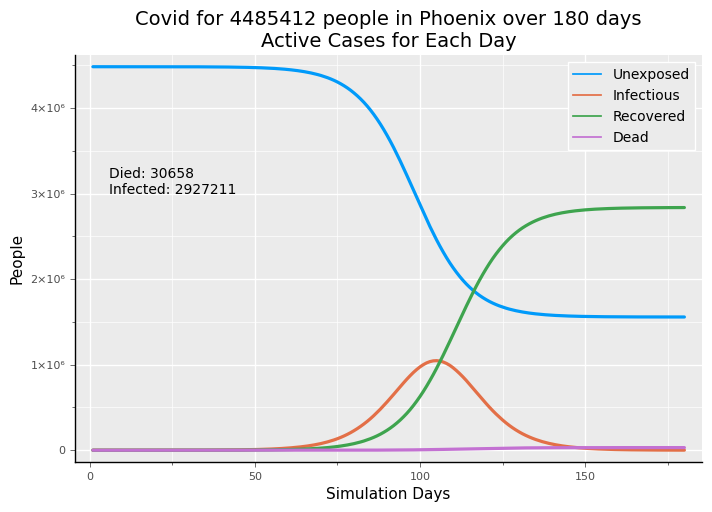

In [49]:
cumplot(series,11,geo=geo)

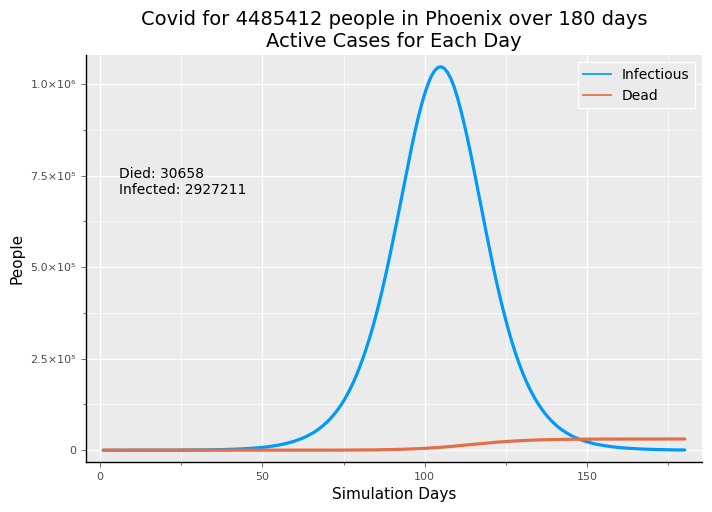

In [51]:
cumplot(series, 11, [infectious, dead], geo=geo)

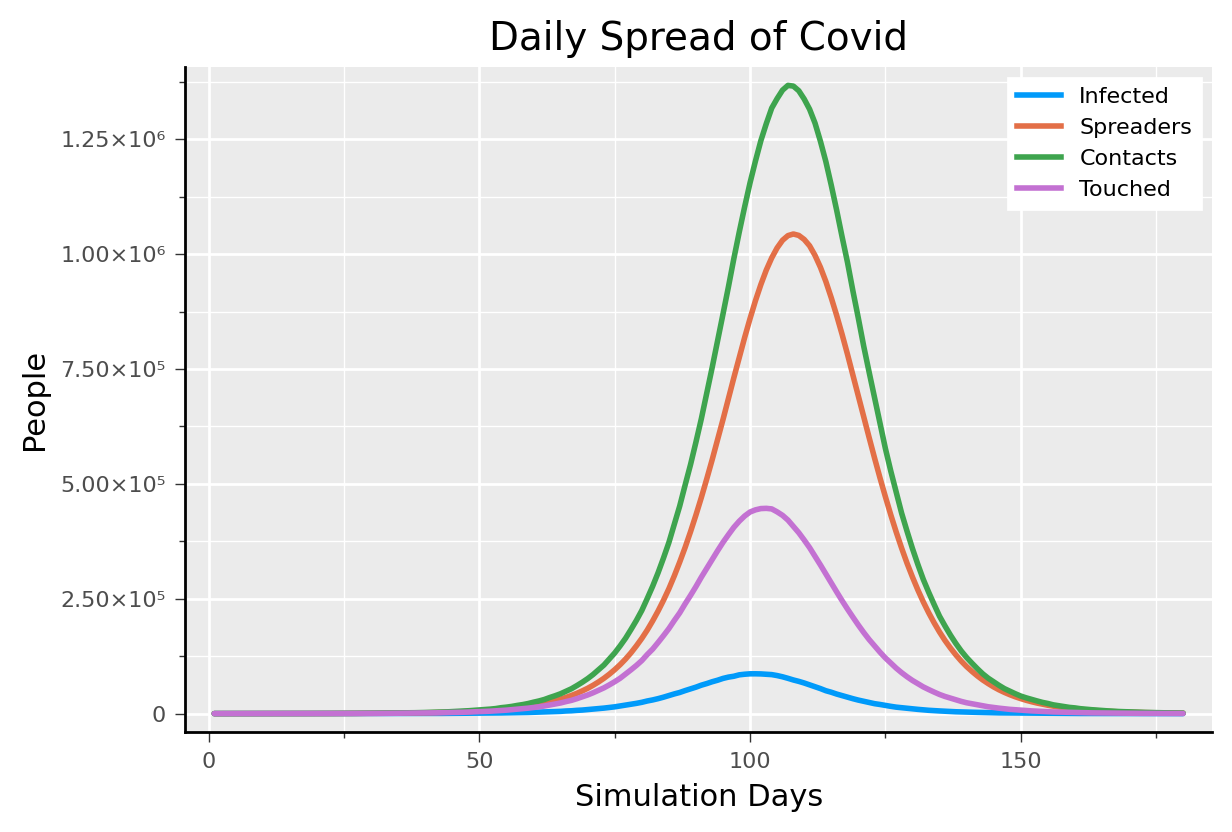

In [11]:
dayplot(spreadq,[:spreaders, :contacts, :touched])

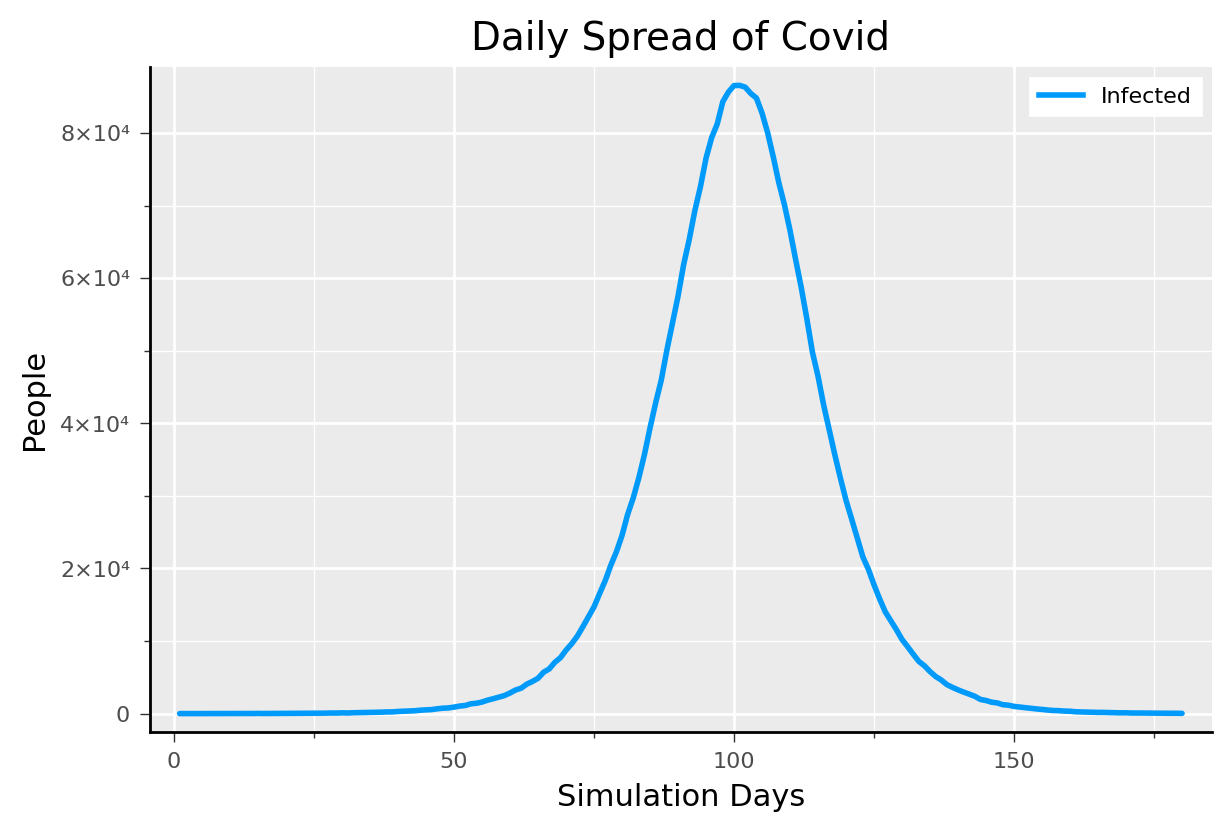

In [12]:
dayplot(spreadq)

#### Social Distancing

Here is a case when social distancing starts on day 60 with 75% compliance and is rather strong in terms of contacts and touches.

In [24]:
str_60 = sd_gen(start=60, comply=.75, cf=(.3,1.2), tf=(.18,.4));
alldict, env, series = run_a_sim(180,11, silent=true,
    spreadcases=[str_60], 
    runcases=[seed_1_6, seed_6_12]);

*** seed day 1 locale 11....
*** seed day 8 locale 11....
at day 10 r0 = 1.92
at day 20 r0 = 2.03
at day 30 r0 = 1.98
at day 40 r0 = 2.02
at day 50 r0 = 1.99
at day 60 r0 = 1.18
at day 70 r0 = 1.16
at day 80 r0 = 1.22
at day 90 r0 = 1.2
at day 100 r0 = 1.25
at day 110 r0 = 1.13
at day 120 r0 = 1.14
at day 130 r0 = 1.17
at day 140 r0 = 1.14
at day 150 r0 = 1.14
at day 160 r0 = 1.12
at day 170 r0 = 1.15
at day 180 r0 = 1.08
Simulation completed for 180 days.


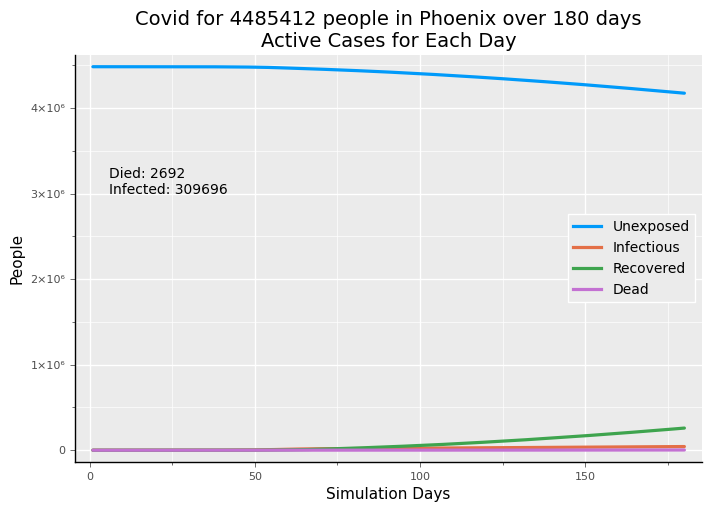

In [25]:
cumplot(series, 11, geo=geo)

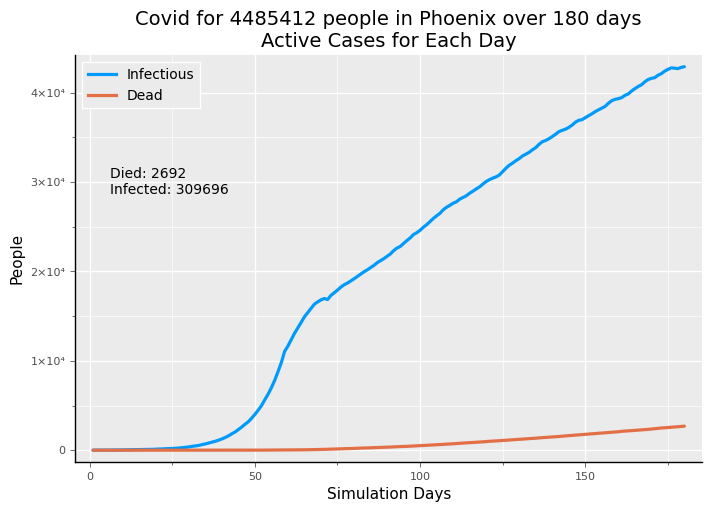

In [26]:
cumplot(series, 11, [infectious, dead],geo=geo)

In [27]:
76670/2605750

0.029423390578528254

In [28]:
str_50 = sd_gen(start=50, comply=.75, cf=(.3,1.2), tf=(.18,.4));
alldict, env, series = run_a_sim(180, 11, silent=true,
    spreadcases=[str_50],
    runcases=[seed_1_6, seed_6_12]);

*** seed day 1 locale 11....
*** seed day 8 locale 11....
at day 10 r0 = 1.86
at day 20 r0 = 1.94
at day 30 r0 = 1.91
at day 40 r0 = 1.99
at day 50 r0 = 1.27
at day 60 r0 = 1.26
at day 70 r0 = 1.19
at day 80 r0 = 1.29
at day 90 r0 = 1.12
at day 100 r0 = 1.21
at day 110 r0 = 1.24
at day 120 r0 = 1.16
at day 130 r0 = 1.27
at day 140 r0 = 1.24
at day 150 r0 = 1.2
at day 160 r0 = 1.12
at day 170 r0 = 1.17
at day 180 r0 = 1.17
Simulation completed for 180 days.


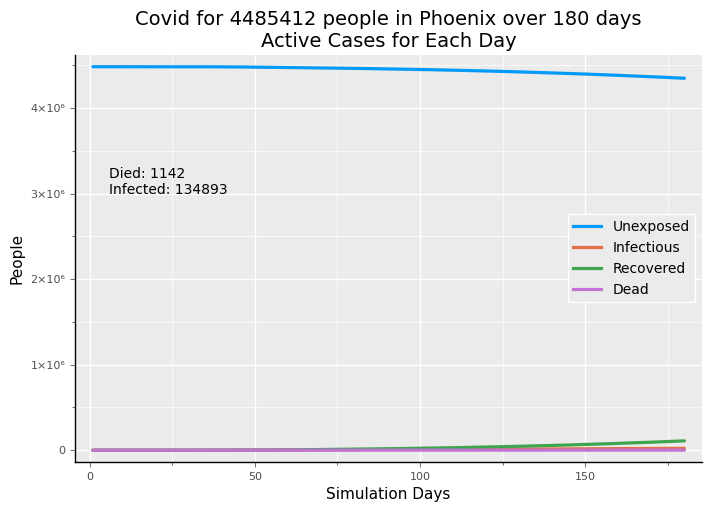

In [29]:
cumplot(series, 11, geo=geo)

We cut not quite another 30% of infections compared to starting isolation 10 days later.  With exponential growth, 
when you start mitigation practices makes a big difference. 

Looking at this the authorities could say, "We are in great shape; we have this virus licked." 

Let's see what happens if we open up to where we were before after 30 days of social distancing.

In [30]:
open_all = sd_gen(start=80, comply=0.0, cf=(.2,1.8), tf=(.18,.62)); 
alldict, env, series = run_a_sim(180,10,silent=true,
    spreadcases=[str_50,open_all],
    runcases=[seed_1_6, seed_6_12]);  

*** seed day 1 locale 10....
*** seed day 8 locale 10....
at day 10 r0 = 1.97
at day 20 r0 = 2.02
at day 30 r0 = 2.04
at day 40 r0 = 1.95
at day 50 r0 = 1.08
at day 60 r0 = 1.12
at day 70 r0 = 0.96
at day 80 r0 = 1.43
at day 90 r0 = 1.46
at day 100 r0 = 1.24
at day 110 r0 = 0.96
at day 120 r0 = 0.87
at day 130 r0 = 0.82
at day 140 r0 = 0.79
at day 150 r0 = 0.76
at day 160 r0 = 0.71
at day 170 r0 = 0.72
at day 180 r0 = 0.72
Simulation completed for 180 days.


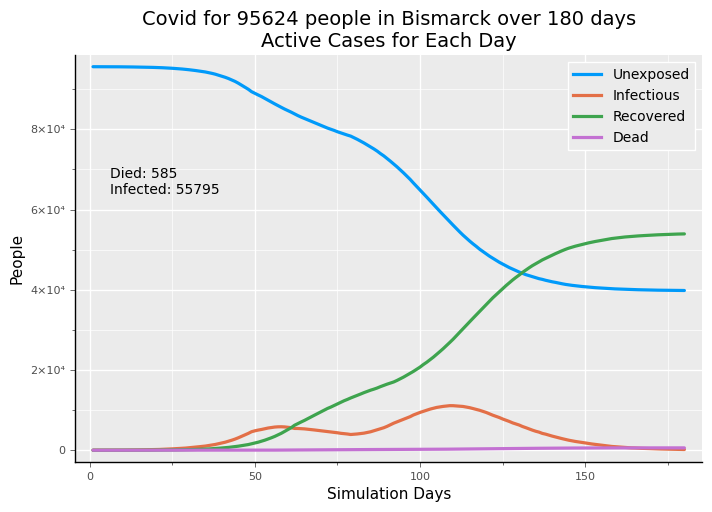

In [32]:
cumplot(series, 10, geo=geo)

It's kind of like nothing happened because of social distancing. We stopped the rise early; then we started the rise.
We ended up in nearly the same place, except everything started later and the simulation ends before
the infection curve burns itself out.

|              | Infections | Deaths|
|--------------|---------|----------|
|No restrictions | 2,605,750 | 27,199 |
| Restrict. on/off | 2,522,693 | 23,244 |

Because Maricopa County has a large population of over 4 million, 18 people coming in with infections takes a while to get the exponential growth curve "rolling".  What would be more typical is a double bump.  Social distancing starts after significant growth is observed; then it brings the curve down; the people cheer; social distancing ends. 

Let's see what happens in a smaller place like Omaha, Nebraska and we won't open up totally, which does get us back 
to what looks like no social distancing at all.

In [44]:
close = sd_gen(start=50, comply=.75, cf=(.3,1.2), tf=(.18,.4)); open = sd_gen(start=90, comply=.75, cf=(.2,1.5), tf=(.18,.5));
alldict, env, series = run_a_sim(180,10, silent=true, 
    spreadcases=[close, open], 
    runcases=[seed_1_6, seed_6_12]);

*** seed day 1 locale 10....
*** seed day 8 locale 10....
at day 10 r0 = 1.94
at day 20 r0 = 2.12
at day 30 r0 = 1.97
at day 40 r0 = 1.97
at day 50 r0 = 1.2
at day 60 r0 = 1.19
at day 70 r0 = 1.06
at day 80 r0 = 1.09
at day 90 r0 = 1.29
at day 100 r0 = 1.22
at day 110 r0 = 1.19
at day 120 r0 = 1.08
at day 130 r0 = 1.02
at day 140 r0 = 0.92
at day 150 r0 = 0.88
at day 160 r0 = 0.92
at day 170 r0 = 0.84
at day 180 r0 = 0.87
Simulation completed for 180 days.


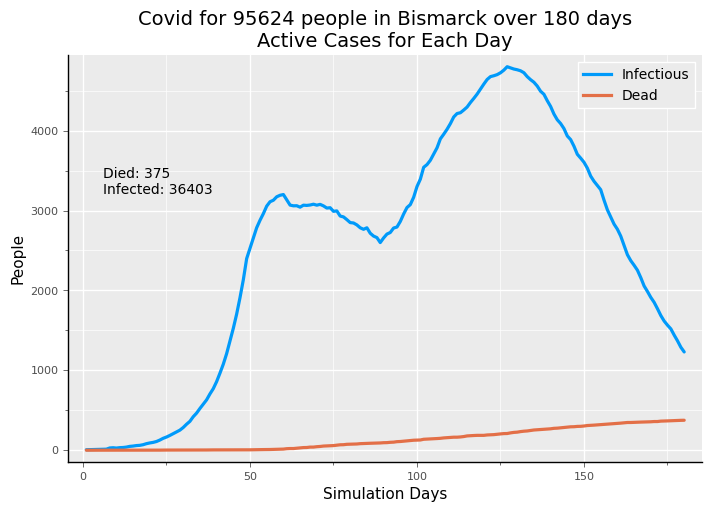

In [45]:
cumplot(series, 10,[infectious, dead], geo=geo)

In [42]:
alldict, env, series = run_a_sim(180, 10, silent=true,
    spreadcases=[],
    runcases=[seed_1_6, seed_6_12]);

*** seed day 1 locale 10....
*** seed day 8 locale 10....
at day 10 r0 = 2.08
at day 20 r0 = 1.96
at day 30 r0 = 1.91
at day 40 r0 = 1.98
at day 50 r0 = 1.75
at day 60 r0 = 1.29
at day 70 r0 = 0.99
at day 80 r0 = 0.71
at day 90 r0 = 0.62
at day 100 r0 = 0.56
at day 110 r0 = 0.59
at day 120 r0 = 0.58
at day 130 r0 = 0.52
at day 140 r0 = 0.6
at day 150 r0 = 0.61
at day 160 r0 = 0.52
at day 170 r0 = 0.65
at day 180 r0 = 0.61
Simulation completed for 180 days.


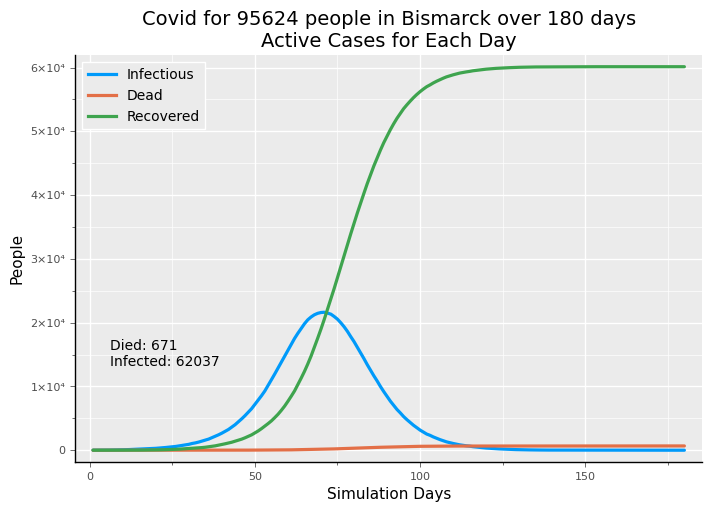

In [43]:
cumplot(series, 10,[infectious, dead, recovered], geo=geo)